importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loading and preprossisng

In [ ]:

data = pd.read_csv('/content/heart_disease_uci.csv')

numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy="median")
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

split the data and scale the fatures

In [ ]:

X = data.drop('num', axis=1)
y = data['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model1 logistic

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

Logistic Regression Results:
Accuracy: 0.5434782608695652
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78        75
         1.0       0.45      0.46      0.45        54
         2.0       0.22      0.08      0.12        25
         3.0       0.24      0.15      0.19        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.32      0.32      0.31       184
weighted avg       0.47      0.54      0.50       184



model 2 random forrest

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_s

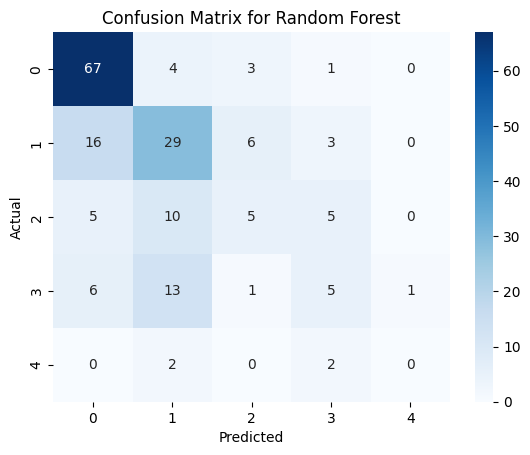

In [ ]:



grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)


print("\nRandom Forest Classifier Results (Tuned):")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))



conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()
